# Optimizer Example
MNIST CNN example showing comparison between dropout rates and batch normalization when using Adam.  This is a classification problem.

Richard Henry, 26-Jul-2024 

Adapted from Keras Documentation. https://keras.io/examples/vision/mnist_convnet/

In [1]:
#Import Libararies
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('fivethirtyeight')

Test Libraries

In [2]:
# Check python version
from platform import python_version
print(python_version())
#3.12.3

3.12.3


In [3]:
# Check tensorflow version
tf.__version__
#2.16.1

'2.17.0'

In [4]:
# Check keras version
tf.keras.__version__
#3.4.1

'3.4.1'

|Dataset|Architecture|Group|Type|
|:---|:---|:---|:---|
|MNIST Handwritten Digits|CNN|Batch Normalization|Classification|

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)
batch_size = 128
num_epochs = 32
drop_frac=0.2
z=['nothing','dropout','batchNorm']

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Build & train model function
def model_core_0():
    # Nothing
    model = tf.keras.Sequential(
        [
            tf.keras.Input(shape=input_shape),
            tf.keras.layers.Conv2D(32, 
                                   kernel_size=(3, 3), 
                                   activation="relu"),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Conv2D(64, 
                                   kernel_size=(3, 3), 
                                   activation="relu"),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_classes, 
                                  activation="softmax"),
        ]
    )
    return model
def model_core_1():
    # Dropout
    model = tf.keras.Sequential(
        [
            tf.keras.Input(shape=input_shape),
            tf.keras.layers.Conv2D(32, 
                                   kernel_size=(3, 3), 
                                   activation="relu"),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Conv2D(64, 
                                   kernel_size=(3, 3), 
                                   activation="relu"),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(num_classes, 
                                  activation="softmax"),
        ]
    )
    return model
def model_core_2():
    # Batch Normalizaton
    model = tf.keras.Sequential(
        [
            tf.keras.Input(shape=input_shape),
            tf.keras.layers.Conv2D(32, 
                                   kernel_size=(3, 3), 
                                   activation="relu"),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Conv2D(64, 
                                   kernel_size=(3, 3), 
                                   activation="relu"),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(num_classes, 
                                  activation="softmax"),
        ]
    )
    return model


def model_build(choice):
    #Build it exactly the same every time
    tf.random.set_seed(19)
    if (choice=='nothing'):
        model=model_core_0()
    elif (choice=='dropout'):
        model=model_core_1()
    else:
        model=model_core_2()
    model.compile(loss="categorical_crossentropy", 
                  optimizer='adam', 
                  metrics=['accuracy'])
    # Reduce variation in training...
    tf.random.set_seed(17)
    print("History Match:",choice)
    myHis=model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=num_epochs,
                    validation_split=0.1,
                    verbose=0)
    #print("\n")
    print("Evaluate Model:")
    score = model.evaluate(x_test, 
                           y_test, 
                           verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    print("\n")
    #print("Timing:")
    return myHis,score

In [7]:
%%time
# No Dropout or Batch Normalization
h0,s0=model_build(z[0])
print("Timing:")

History Match: nothing
Evaluate Model:
Test loss: 0.06184276193380356
Test accuracy: 0.9894000291824341


Timing:
CPU times: total: 2min 13s
Wall time: 2min 48s


In [8]:
%%time
# 50% Dropout
h1,s1=model_build(z[1])
print("Timing:")

History Match: dropout
Evaluate Model:
Test loss: 0.020217588171362877
Test accuracy: 0.993399977684021


Timing:
CPU times: total: 2min 44s
Wall time: 3min 26s


In [9]:
%%time
# Default Batch Normalization
h2,s2=model_build(z[2])
print("Timing:")

History Match: batchNorm
Evaluate Model:
Test loss: 0.0371398851275444
Test accuracy: 0.9925000071525574


Timing:
CPU times: total: 2min 51s
Wall time: 3min 36s


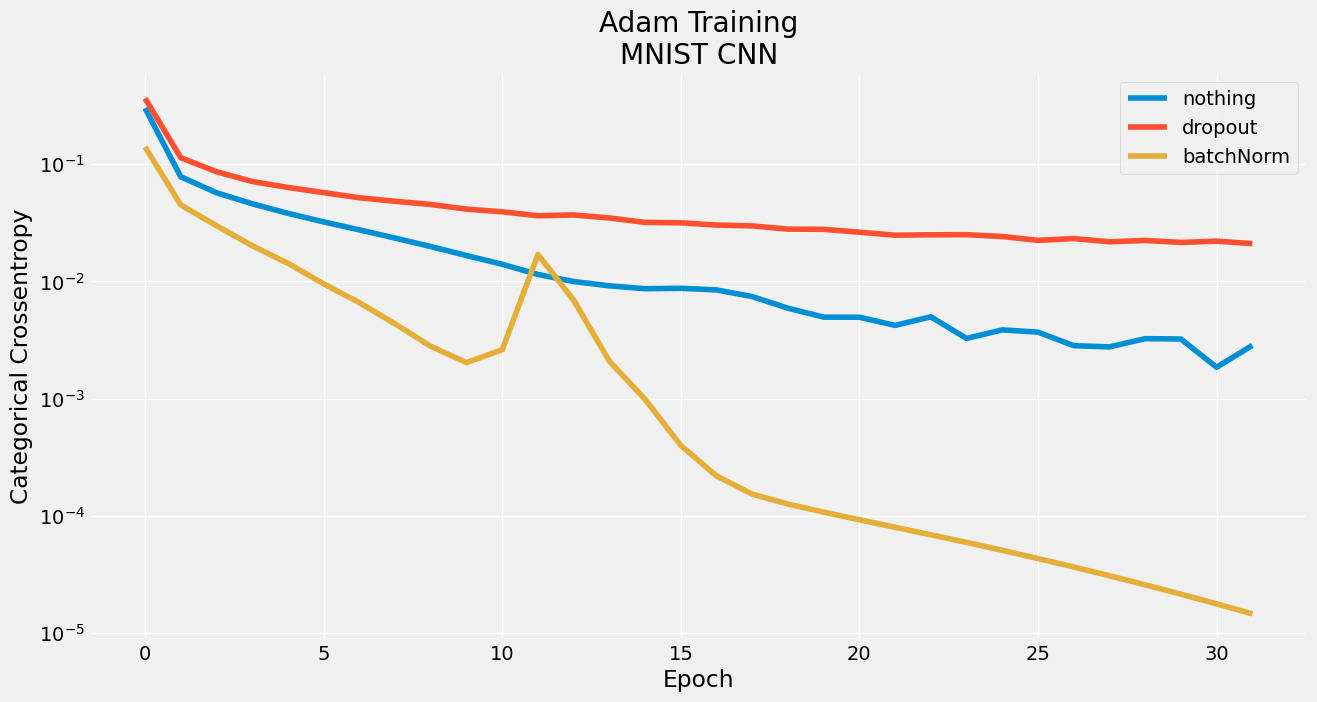

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(h0.history['loss'])
plt.plot(h1.history['loss'])
plt.plot(h2.history['loss'])
plt.yscale('log')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.title('Adam Training\nMNIST CNN')
plt.grid(color='white')
plt.legend(z)
plt.show()

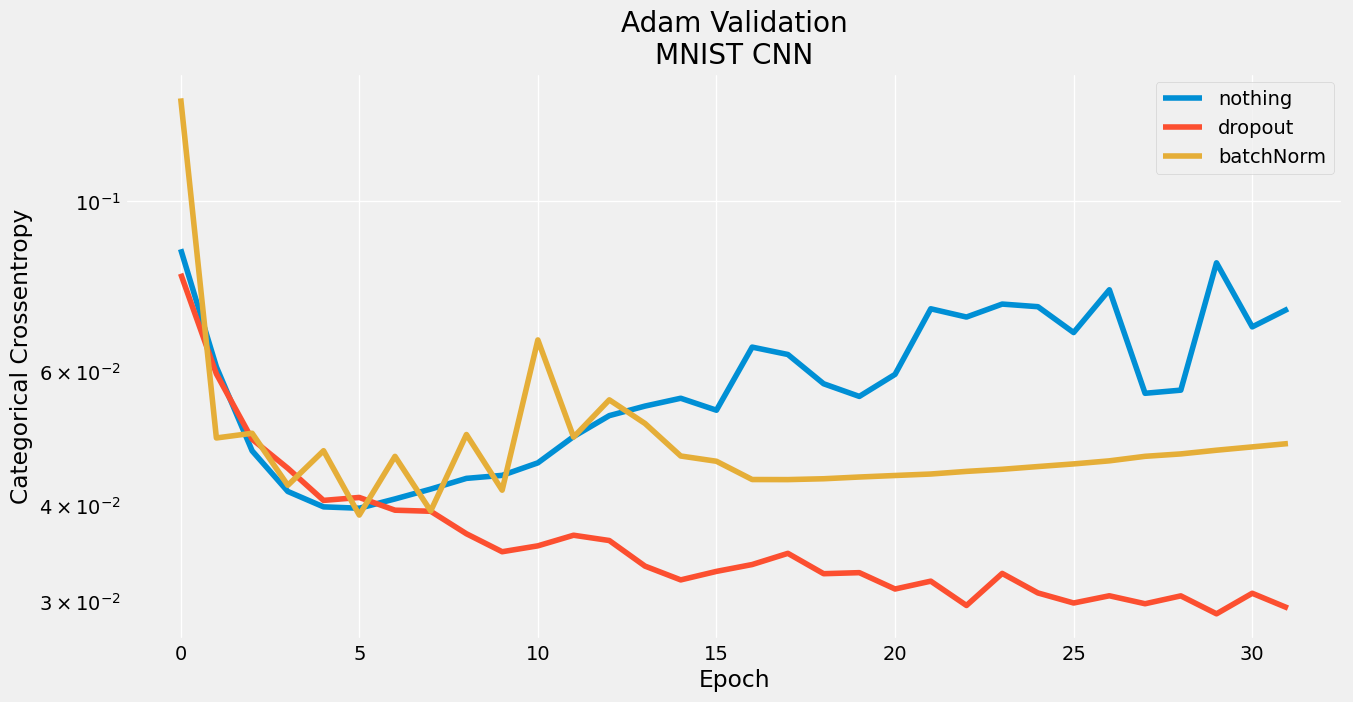

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(h0.history['val_loss'])
plt.plot(h1.history['val_loss'])
plt.plot(h2.history['val_loss'])
plt.yscale('log')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.title('Adam Validation\nMNIST CNN')
plt.grid(color='white')
plt.legend(z)
plt.show()

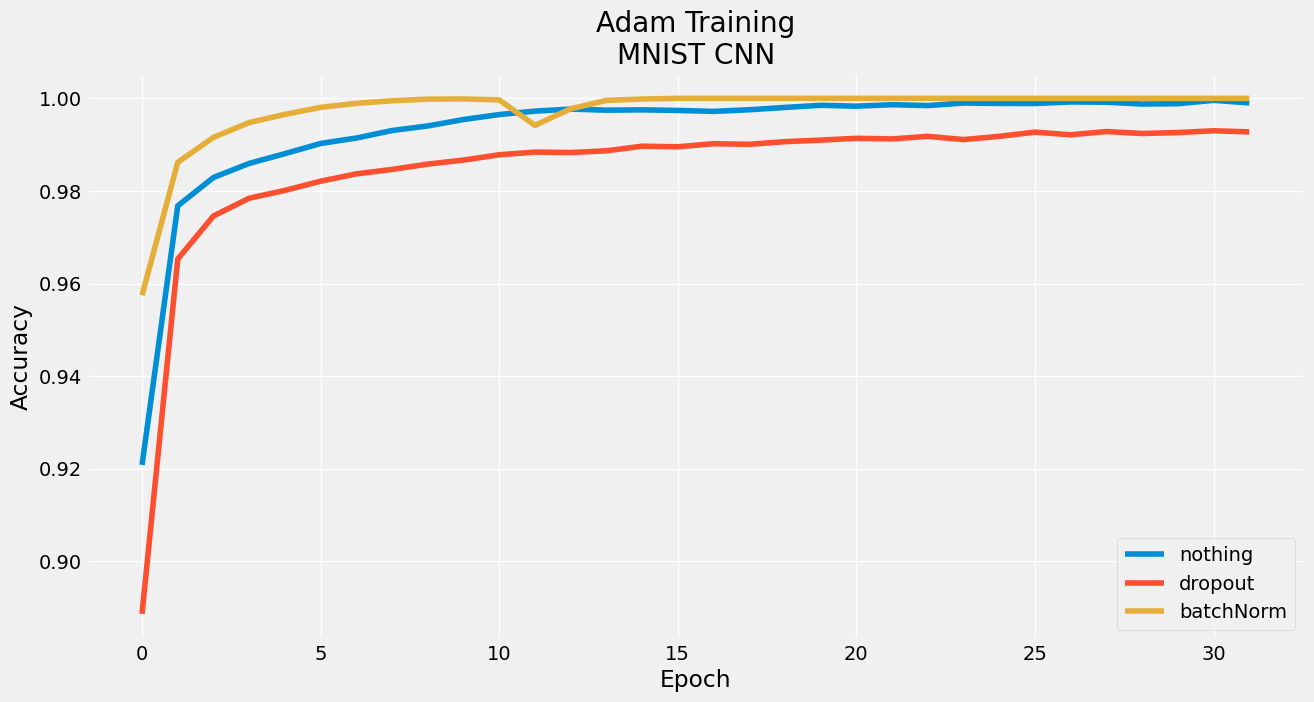

In [12]:
plt.figure(figsize=(14, 7))
plt.plot(h0.history['accuracy'])
plt.plot(h1.history['accuracy'])
plt.plot(h2.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Adam Training\nMNIST CNN')
plt.grid(color='white')
plt.legend(z)
plt.show()

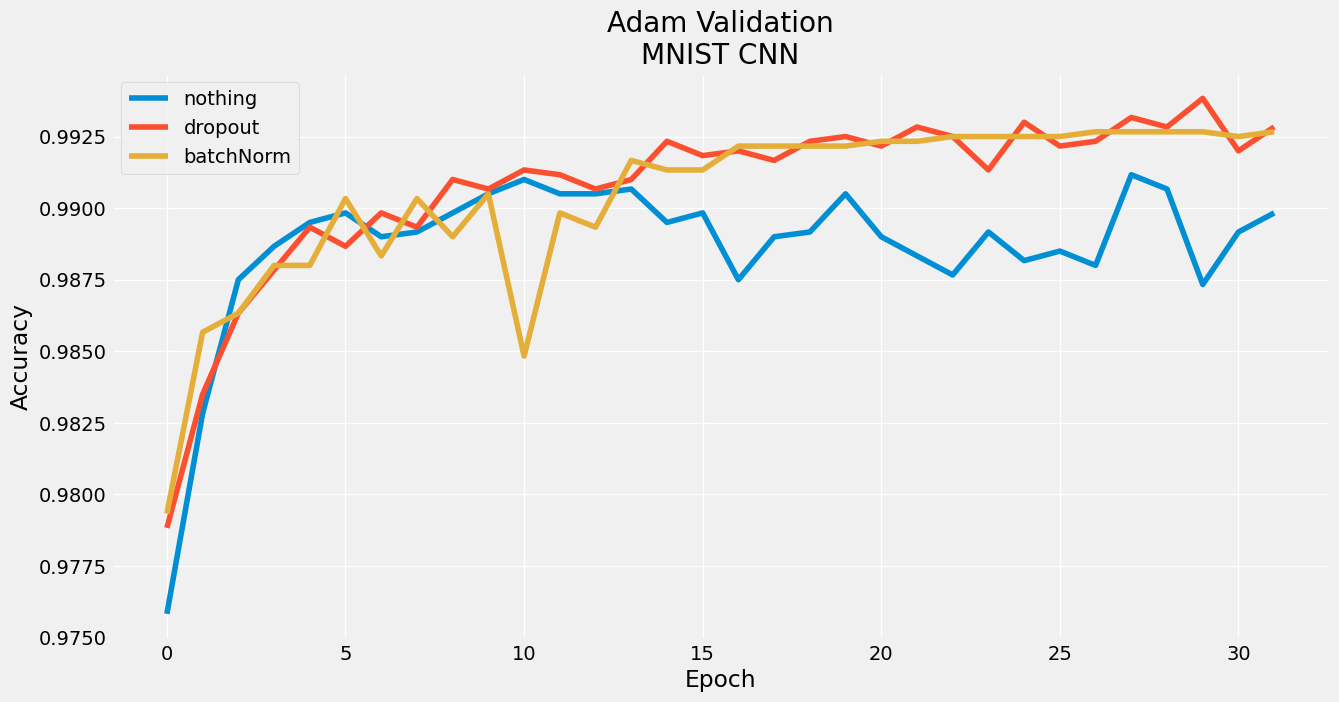

In [13]:
plt.figure(figsize=(14, 7))
plt.plot(h0.history['val_accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Adam Validation\nMNIST CNN')
plt.grid(color='white')
plt.legend(z)
plt.show()

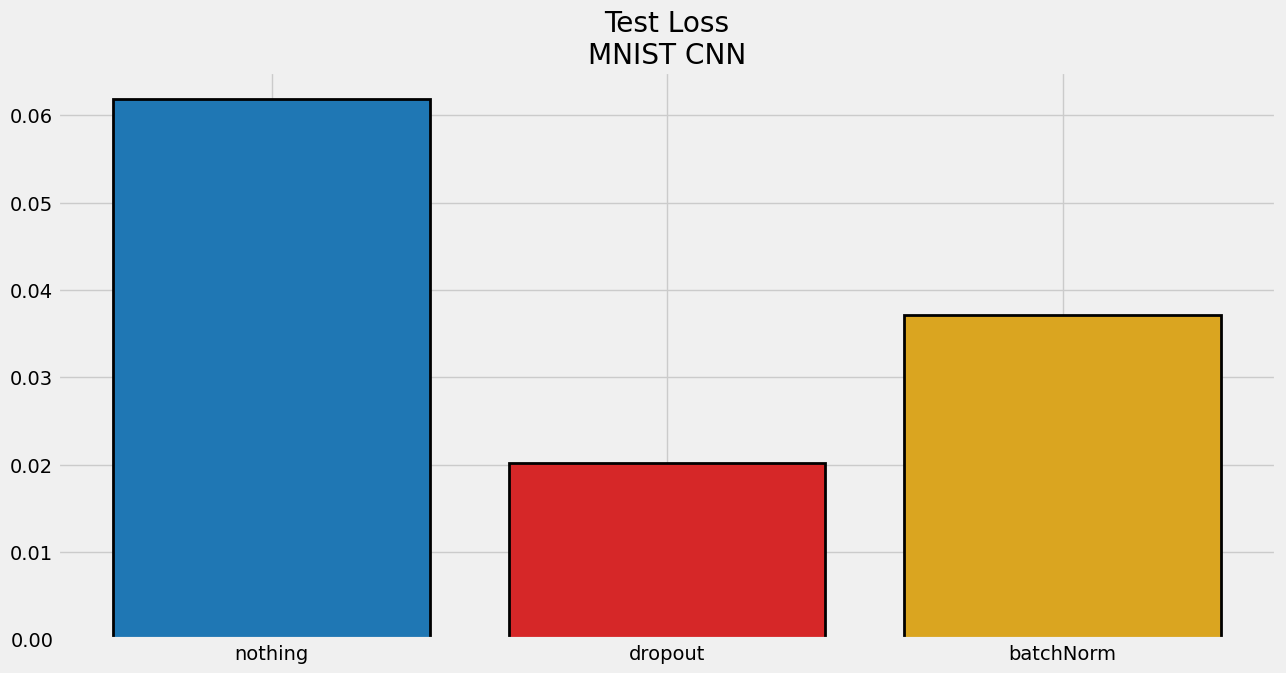

In [26]:
x=range(3)
y_loss=[s0[0],s1[0],s2[0]]
plt.figure(figsize=(14, 7))
plt.bar(x,y_loss,tick_label=z,edgecolor='black',color=['tab:blue','tab:red','goldenrod'],linewidth=2)
plt.title('Test Loss\nMNIST CNN')
plt.show()


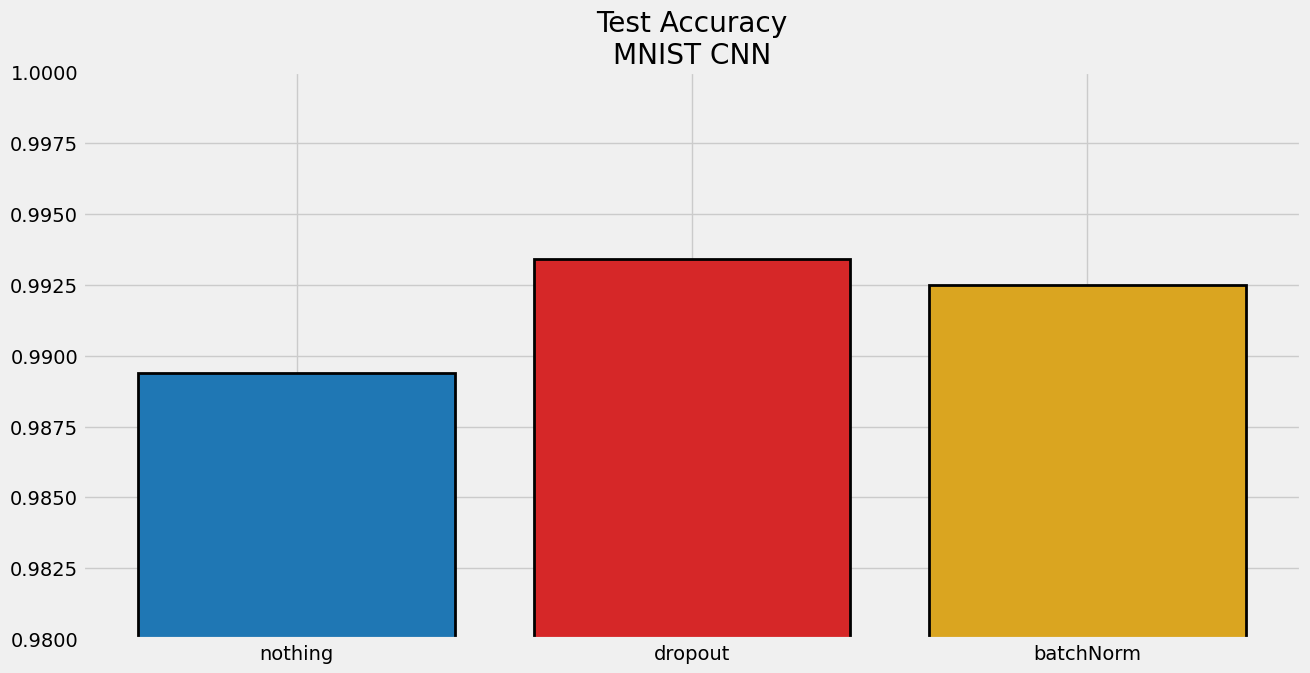

In [27]:
y_loss=[s0[1],s1[1],s2[1]]
plt.figure(figsize=(14, 7))
plt.bar(x,y_loss,tick_label=z,edgecolor='black',color=['tab:blue','tab:red','goldenrod'],linewidth=2)
plt.title('Test Accuracy\nMNIST CNN')
plt.ylim([0.980,1])
plt.show()